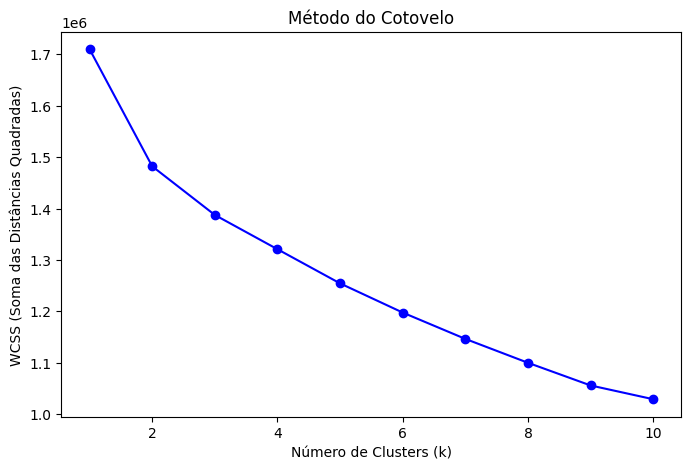


Clusters formados com k=4:
Cluster
1    44947
0    34372
2    26330
3     8351
Name: count, dtype: int64


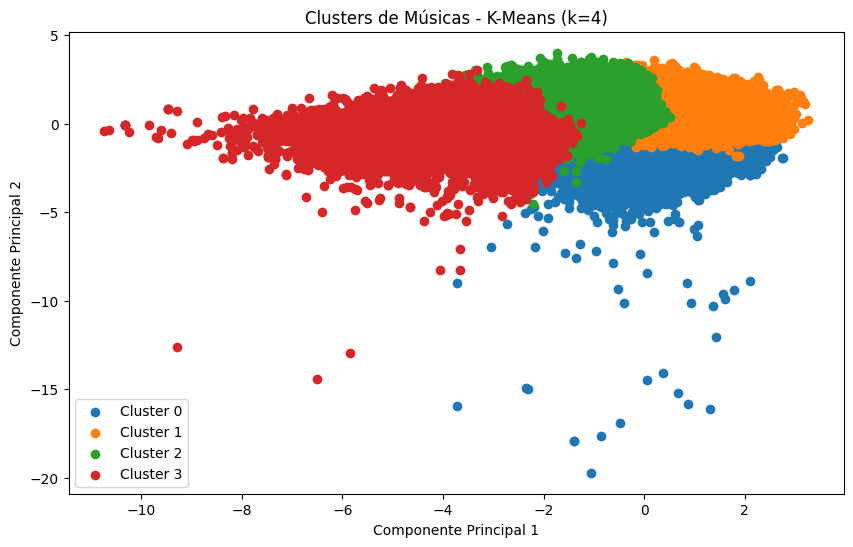


🔹 Modelo: SVM Linear
Acurácia: 0.7835
Relatório de Classificação:
                   precision    recall  f1-score   support

         acoustic       0.89      0.88      0.89       300
         afrobeat       0.79      0.80      0.80       300
         alt-rock       0.60      0.68      0.64       300
      alternative       0.72      0.62      0.67       300
          ambient       0.82      0.87      0.85       300
            anime       0.83      0.81      0.82       300
      black-metal       0.92      0.90      0.91       300
        bluegrass       0.75      0.85      0.79       300
            blues       0.63      0.54      0.58       300
           brazil       0.76      0.78      0.77       300
        breakbeat       0.87      0.90      0.88       300
          british       0.83      0.67      0.74       300
         cantopop       0.73      0.85      0.79       300
    chicago-house       0.97      0.96      0.97       300
         children       0.82      0.80      0.8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv("dataset.csv")
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
X = df[colunas_numericas]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Método do Cotovelo para encontrar o k ideal
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# 1.a. Gráfico do cotovelo
plt.figure(figsize=(8,5))
plt.plot(K, wcss, 'bo-')
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("WCSS (Soma das Distâncias Quadradas)")
plt.show()

# 1.b. depois de olhar o gráfico, escolhi k=4
k_ideal = 4
kmeans_final = KMeans(n_clusters=k_ideal, random_state=42)
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

print(f"\nClusters formados com k={k_ideal}:")
print(df['Cluster'].value_counts())

# Visualização c/ PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10,6))
for cluster in range(k_ideal):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.title(f"Clusters de Músicas - K-Means (k={k_ideal})")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

y = df["track_genre"]
le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# 3 Modelos de ML
svm_linear = SVC(kernel="linear", random_state=42)
svm_poly = SVC(kernel="poly", degree=3, random_state=42)
svm_rbf = SVC(kernel="rbf", random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

modelos = {
    "SVM Linear": svm_linear,
    "SVM Polinomial": svm_poly,
    "SVM RBF": svm_rbf,
    "Random Forest": rf
}

# 4. Avaliação de modelos, precisão, recall, f1-score...
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n🔹 Modelo: {nome}")
    print(f"Acurácia: {acc:.4f}")
    print("Relatório de Classificação:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
